# Load the relabeled calsses, pcs and v_exp of the climo data

In [1]:
import xarray as xr
# import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

ds_sat.info



<bound method Dataset.info of <xarray.Dataset>
Dimensions:                (age: 65, lat: 96, lon: 144)
Coordinates:
  * lat                    (lat) float32 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lon                    (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * age                    (age) float32 1.11e+04 1.13e+04 ... 2.37e+04 2.39e+04
Data variables:
    sat                    (age, lat, lon) float32 ...
    sat_std                (age, lat, lon) float32 ...
    sat_centered           (age, lat, lon) float32 ...
    weight                 (lat) float32 ...
    sat_centered_weighted  (age, lat, lon) float32 ...
    class_label            (lat, lon) int64 ...
    class_relabeled        (lat, lon) int32 ...>

# Load the weighted average from the ensemble data

In [2]:
# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

# Load classified TraCE data 

In [3]:
# read the TraCE_data/ds_TraCE_EOFs_GMM.nc

import xarray as xr
import numpy as np

ds_TraCE_EOFs_GMM = xr.open_dataset('TraCE_data/ds_TraCE_EOFs_GMM.nc')

# read the reshaped_probs_TraCE_GMM
reshaped_probs_TraCE_GMM = np.load('TraCE_data/reshaped_probs_TraCE_GMM.npy')

class_labels = ds_TraCE_EOFs_GMM['class_label'].values  # Ensure this is your class label data

n_components = 4
# Define a new class label for low probabilities
low_prob_label = n_components  # Assuming this is the next integer after your max class label

# Update class_labels for locations where prob < 0.9 to the new class
class_labels_updated = np.where(reshaped_probs_TraCE_GMM < 0.56, low_prob_label, class_labels)

# class_labels_updated got shape (48,96), which is the same as the (lat, lon) shape of the ds_TraCE_EOFs_GMM['class_label']
# please store class_labels_updated to ds_TraCE_EOFs_GMM['class_labels_updated']

ds_TraCE_EOFs_GMM['class_labels_updated'] = (('lat', 'lon'), class_labels_updated)

# print the unique values of class_labels_updated
print(np.unique(class_labels_updated))
ds_TraCE_EOFs_GMM.info



[0 1 2 3 4]


<bound method Dataset.info of <xarray.Dataset>
Dimensions:                (age: 2204, lat: 48, lon: 96)
Coordinates:
  * lat                    (lat) float64 -87.16 -83.48 -79.78 ... 83.48 87.16
  * lon                    (lon) float64 0.0 3.75 7.5 ... 348.8 352.5 356.2
  * age                    (age) float64 2.2e+04 2.199e+04 ... -20.0 -30.0
Data variables:
    sat                    (age, lat, lon) float32 ...
    sat_centered           (age, lat, lon) float32 ...
    weight                 (lat) float64 ...
    sat_centered_weighted  (age, lat, lon) float64 ...
    class_label            (lat, lon) int64 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2
    class_labels_updated   (lat, lon) int64 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b30.22_0kaDVT
    title:                     b30.22_0kaDVT b30.22_0kaDVT
    logname:                   fenghe
    host:                      phoenix
  

# Calculate the weighted average of TraCE

In [4]:
# load the TraCE_weighted_avg
import pickle
with open('data_fig2/TraCE_weighted_avg.pkl', 'rb') as f:
    TraCE_weighted_avg = pickle.load(f)

In [13]:
# # save TraCE_weighted_avg to data_fig2
# import pickle
# with open('data_fig2/TraCE_weighted_avg.pkl', 'wb') as f:
#     pickle.dump(TraCE_weighted_avg, f)

In [ ]:
# from toolbox import GMM_functions as gf
# import importlib
# importlib.reload(gf) 

# TraCE_weighted_avg=gf.plot_weighted_average_curve(ds_TraCE_EOFs_GMM.copy(), label_var_name='class_labels_updated',dpi=100)

In [5]:
import numpy as np

cp_age_bootstrap = np.array([20926, 16932, 17101, 16894])
cp_age_bootstrap_CI = np.array([
    [21270, 20813],
    [17358, 16813],
    [17190, 17010],
    [17142, 16647]
])


# Plot

-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [14. 23. 33. 40. 48.]
selected_cp_index: 2
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 34. 51.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2


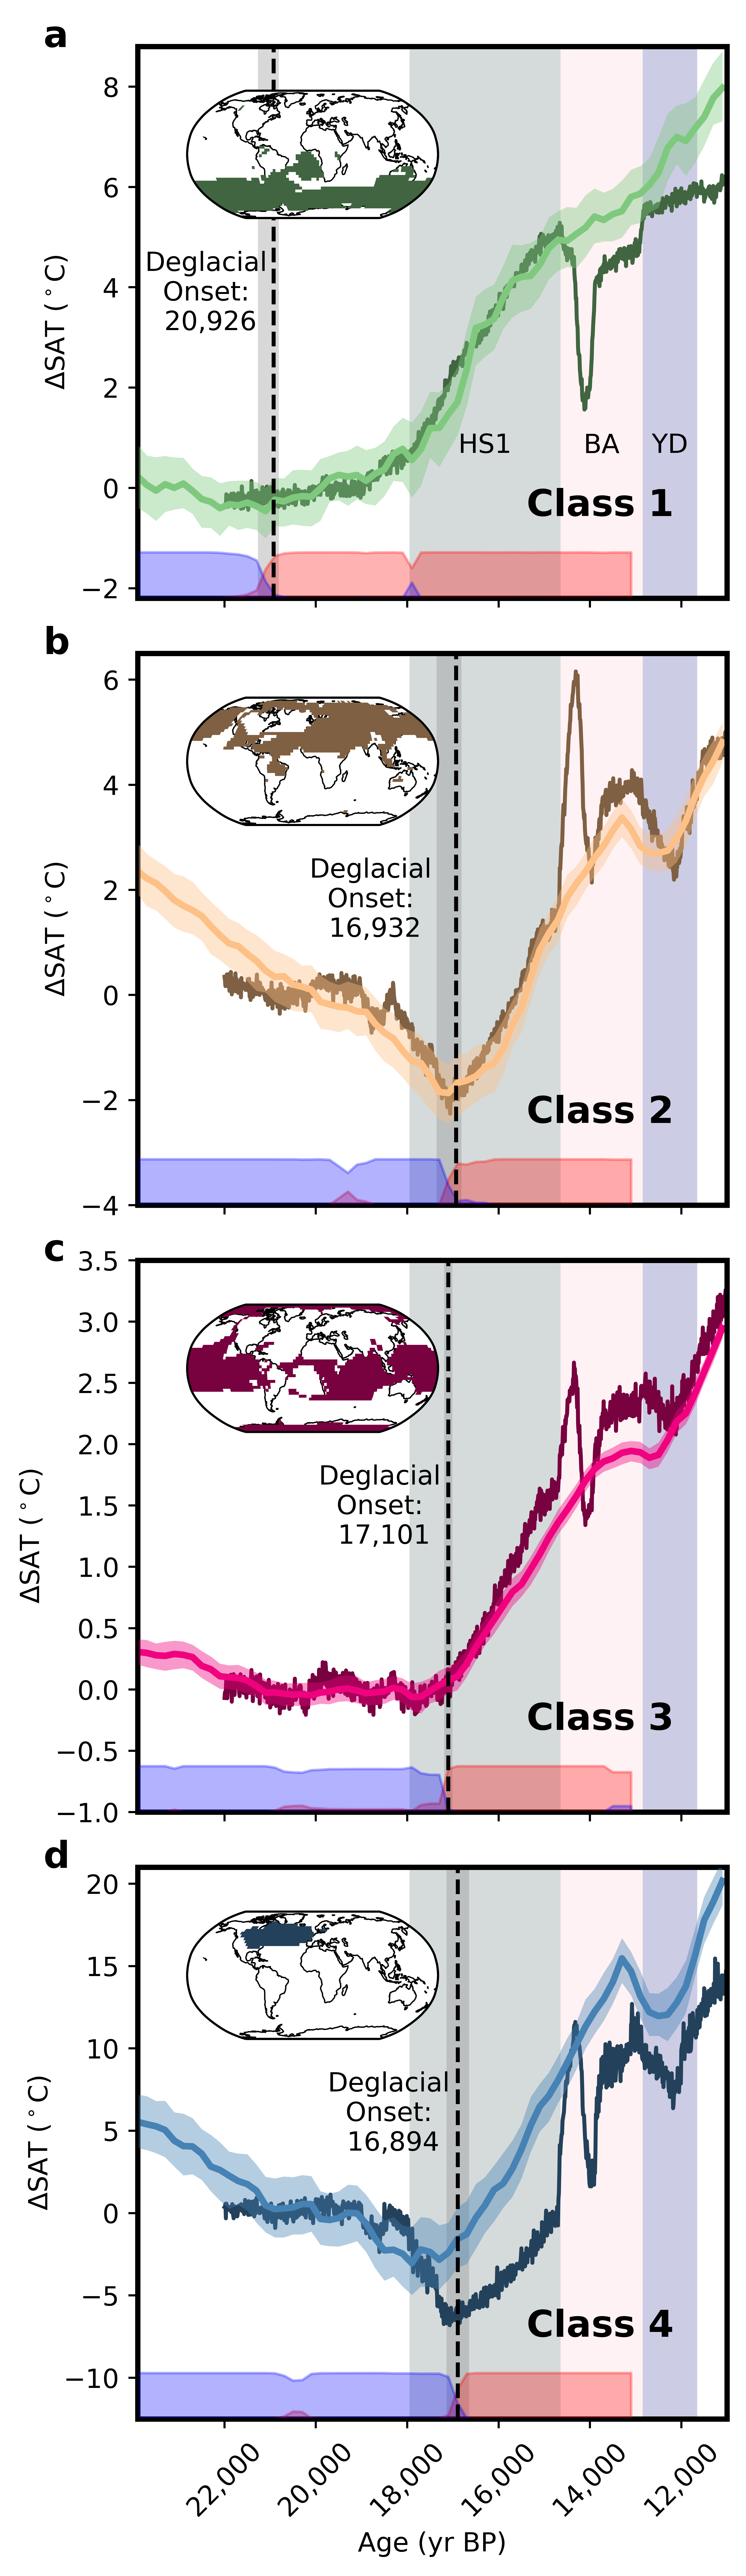

In [6]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

fig, axs = plt.subplots(4, 1, figsize=(4, 16.2), dpi=900, sharex=True)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
        (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
        (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
        (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
        (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
    ]
    cmap = ListedColormap(custom_colors)
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))

custom_colors_1 = [
    (0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
    (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
    (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
    (0.13725490196078433, 0.2549019607843137, 0.35294117647058826),
]
cmap1 = ListedColormap(custom_colors_1)

# Climate transitions timing
HS1 = np.array([18000, 14692]) - 50
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims = [[-2.2, 8.8], [-4, 6.5], [-1, 3.5], [-12.5, 21]]

# =====================
# 1) PLOT THE MAIN 4 SUBPLOTS
# =====================
for i in range(4):
    ax1 = axs[i]

    weighted_avg_curves_k = [
        curves[i] for curves in all_weighted_avg_curves if i in curves
    ]

    # Normalize
    for j in range(len(weighted_avg_curves_k)):
        data = weighted_avg_curves_k[j]
        data_18100_21000 = np.mean(data[35:55])
        data = data - data_18100_21000
        weighted_avg_curves_k[j] = data

    weighted_avg_curves_k_25th = np.percentile(weighted_avg_curves_k, 25, axis=0)
    weighted_avg_curves_k_75th = np.percentile(weighted_avg_curves_k, 75, axis=0)
    weighted_avg_curves_k_median = np.median(weighted_avg_curves_k, axis=0)

    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']

    ax1.set_ylim(ylims[i])
    
    # Plot climate transitions
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)

    # Plot TraCE data
    TraCE_base = np.mean(TraCE_weighted_avg[i][0:401])
    ax1.plot(
        ds_TraCE_EOFs_GMM['age'],
        (TraCE_weighted_avg[i] - TraCE_base) * 1.6,
        color=cmap1(i),
        linewidth=1.5,
        linestyle='-',
        zorder=2,
    )






    # # Change point marker
    # ax1.errorbar(
    #     cp_age_bootstrap[i],
    #     np.min(ax1.get_ylim()) + 0.11 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
    #     fmt='^',
    #     color='k',
    #     markersize=7,
    #     capsize=5,
    #     capthick=2,
    #     elinewidth=2,
    # )

    if i == 0:
        ax1.text(
            x=np.mean(HS1),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='HS1',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(BA),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='BA',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(YD),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='YD',
            ha='center',
            va='top',
        )

    # Fill between percentiles
    ax1.fill_between(
        ds_sat['age'].values,
        weighted_avg_curves_k_25th,
        weighted_avg_curves_k_75th,
        color=cmap(i),
        alpha=0.4,
        linewidth=0,
        zorder=3,
    )

    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i), linewidth=2.5)


    if i == 3:
        ax1.set_xlabel('Age (yr BP)')
    ax1.set_xlim([11000, 23900])
    ax1.invert_xaxis()
    # Use a custom formatter to put commas in the tick labels
    ax1.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
    # rotate the xtick labels
    ax1.tick_params(axis='x', rotation=45)

    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')

    for spine in ax1.spines.values():
        spine.set_linewidth(2)

    # Twin axis for probabilities
    ax2 = ax1.twinx()
    ax2.set_ylim([0, 12])
    ax2.set_yticks([])
    ax2.set_yticklabels([])

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)
    ax2.axvline(x=cp_age_bootstrap[i], color='k', linestyle='--')

    # plot a vertical grey rectangle for the 95% CI (cp_age_bootstrap_CI) with the high matchs the y limit
    ax1.fill_betweenx(ylims[i], cp_age_bootstrap_CI[i][0], cp_age_bootstrap_CI[i][1], color='grey', alpha=0.3,edgecolor='none')

    # age_text = str(int(cp_age_bootstrap[i]))
    # ax2.text(
    #     x=cp_age + 1500,
    #     y=0.63 * (np.max(ax2.get_ylim())-np.min(ax2.get_ylim())),
    #     s='Deglacial\nOnset:\n ' + age_text,
    #     ha='center',
    #     va='top',
    # )


    age_text = f"{int(cp_age_bootstrap[i]):,}"
    ax2.text(
        x=cp_age + 1500,
        y=0.63 * (np.max(ax2.get_ylim()) - np.min(ax2.get_ylim())),
        s='Deglacial\nOnset:\n ' + age_text,
        ha='center',
        va='top',
    )


    ax1.text(
        x=-0.16,
        y=1.05,
        s=chr(97 + i),
        transform=ax1.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
    )

    ax1.text(
        x=0.66,
        y=0.2,
        s='Class '+str(i+1),
        transform=ax1.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
    )

# =====================
# 2) FOR EACH CLASS (0 to 3), PLOT A SMALL FLOATING MAP
#    ON TOP OF THE CORRESPONDING SUBPLOT
# =====================

# We'll define a list of top positions for each subplot, from top to bottom
# You can adjust these positions to ensure the maps don't overlap.
map_positions = [0.75, 0.553, 0.356, 0.159]

# Get lat/lon from ds_sat
sat_lat = ds_sat['lat'].values
sat_lon = ds_sat['lon'].values
sat_lon2d, sat_lat2d = np.meshgrid(sat_lon, sat_lat)
class_labels_sat = ds_sat['class_relabeled'].values

# Get lat/lon from ds_TraCE_EOFs_GMM
trace_lat = ds_TraCE_EOFs_GMM['lat'].values
trace_lon = ds_TraCE_EOFs_GMM['lon'].values
trace_lon2d, trace_lat2d = np.meshgrid(trace_lon, trace_lat)
class_labels_trace = ds_TraCE_EOFs_GMM['class_labels_updated'].values

for c in range(4):
    # # 2.1) Create an axis for the LGMR data
    ax_map_sat = fig.add_axes([0.19, map_positions[c], 0.33, 0.19],  # [left, bottom, width, height]
                              projection=ccrs.Robinson())
    ax_map_sat.set_global()
    ax_map_sat.coastlines(linewidth=0.5)
    
    # # Mask for class == c in ds_sat
    # sat_class_mask = np.where(class_labels_sat == c, 1, np.nan)
    # cmap_sat_one = ListedColormap([cmap(c)])  # single color from the main colormap
    
    # ax_map_sat.pcolormesh(sat_lon2d, sat_lat2d, sat_class_mask, 
    #                       shading='auto', cmap=cmap_sat_one, alpha=0.5,
    #                       transform=ccrs.PlateCarree())

    # 2.2) Create a second axis on top of the same area for TraCE data
    ax_map_trace = fig.add_axes([0.19, map_positions[c], 0.33, 0.19], 
                                projection=ccrs.Robinson())
    ax_map_trace.set_global()
    # Make the facecolor transparent, so we see "through" it.
    ax_map_trace.set_facecolor('none')

    # Mask for class == c in TraCE
    trace_class_mask = np.where(class_labels_trace == c, 1, np.nan)
    cmap_trace_one = ListedColormap([cmap1(c)])  # single color from the second colormap
    
    ax_map_trace.pcolormesh(trace_lon2d, trace_lat2d, trace_class_mask, 
                            shading='auto', cmap=cmap_trace_one, alpha=1,
                            transform=ccrs.PlateCarree())

plt.subplots_adjust(hspace=0.1)

fig.savefig('outputs/figure2.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()
